# Jupyter notebook for predicting survival probability in the Titanic disaster. 
# Data from Kaggle
## Heavily modeled after the Titanic Data Science solutions notebook on Kaggle by Manav Sehgal.  Explainatory comments added.  Some things changed towards the end
## Author: Sushant N. More

## Revision history: 
## September 4, 2017: Started writing

In [1]:
#First import all the relevant packages

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The command above is to able to have matplotlib plots
# inline in the Jupyter notebooks

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data

Store the training and testing datasets into Pandas DataFrames. 
We also combine these datasets to run certain operations on both datasets together.

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

First step: always look at the data.  Outputting below the features, number of training examples and so on. 

Look at the first 10 rows below

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
print test_df.columns.values

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Both versions of print work.  Number of "features" one less in the test data because the survival column is absent. 
Note: we don't yet which are the best features to use. 

In [7]:
train_df.shape #getting the number of training examples

(891, 12)

In [8]:
test_df.shape #getting the number of test examples. 

(418, 11)

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Note: Embarked is the port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

Note: pclass is the ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). 
Ordinal: dictionary meaning: relating to a thing's position in a series. 

ordinal numeral: any of the numbers that express degree, quality, or position in a series, as first, second, and third (distinguished from cardinal number)

cardinal numeral. any of the numbers that express amount, as one, two, three, etc. (distinguished from ordinal number).


**Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: Age, Fare. Discrete: SibSp, Parch.

Note: sibsp	# of siblings / spouses aboard the Titanic	
      parch	# of parents / children aboard the Titanic

In [9]:
# preview the data
# number in the paranthesis tells how many rows to show.  If left empty, the default is 5 rows. 
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [10]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names. But then again, do we want to invest effort in correcting them?

In [12]:
print '_'*51

___________________________________________________


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Which features contain blank, null or empty values?**

These will require correcting.

- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features?**

Helping us during converting goal.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

In [15]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df.describe(percentiles=None, include=None, exclude=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

These patterns can be seen by changing the percentiles. 

In [17]:
train_df.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], include=None, exclude=None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [18]:
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

dtypes attributes is a nifty way to get the type of data stored in the columns. The type object stands for string or character. Sometimes, if the type not clear then the object type is used as default, because it is the common type. To get only the columns which have the object types, we can either use include = ['O'] (Note that is upper case 'O' as in Orange) or include = [np.object].

In [20]:
train_df.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

As shown below can output only the specific column(s) in our data frame.  If we wanna ouput more than one columns, put it in double square brackets. 

In [21]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [22]:
train_df[['Name','Sex']].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [23]:
train_df[['Ticket']].head()

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival. (Ages of 714 passengers out of 891 known)
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature. (well.. only two of them missing)

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival. (just some random ticket numbers)
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset. (yo)
3. PassengerId may be dropped from training dataset as it does not contribute to survival. (second that)
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped. (agreed)

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board. (all right)
2. We may want to engineer the Name feature to extract Title as a new feature.  (Is the idea that someone with the title Dr./ Prof more likely to survive?)
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature. (yoo)
4. We may also want to create a Fare range feature if it helps our analysis. (cool)

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

In [24]:
train_df[["Sex", "Survived", "Name"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Clearly if you are a female you have higher chance of survival

In [25]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [26]:
train_df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [27]:
train_df[["Pclass", "Survived"]].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Clear correlation between survival probability and Pclass.  But not between survival and SibSp or Parch

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

Note that creating #, classifying # are the points under the heading Assumptions based on data models. 

## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that y-axis in historgram visualizations represents the count of samples or passengers.

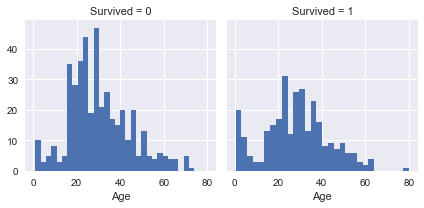

In [28]:
g = sns.FacetGrid(train_df[['Age','Survived']], col='Survived')
g.map(plt.hist, 'Age', bins=30)

The graph on the left is the histogram of people who did not survive and on the right is of the people who survived. Below is the age distribution of all people on board

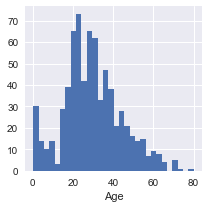

In [29]:
g1 = sns.FacetGrid(train_df)
g1.map(plt.hist, 'Age', bins=30)

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

In [30]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

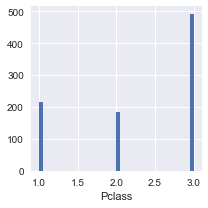

In [31]:
g2 = sns.FacetGrid(train_df)
g2.map(plt.hist, 'Pclass', bins=40)

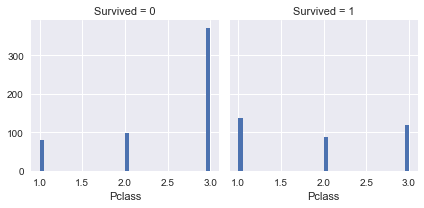

In [32]:
g3 = sns.FacetGrid(train_df,col='Survived')
g3.map(plt.hist, 'Pclass', bins=40)

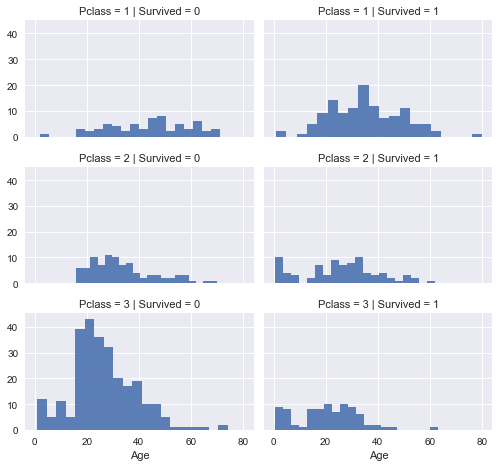

In [33]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.9, bins=20)
#grid.add_legend();

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

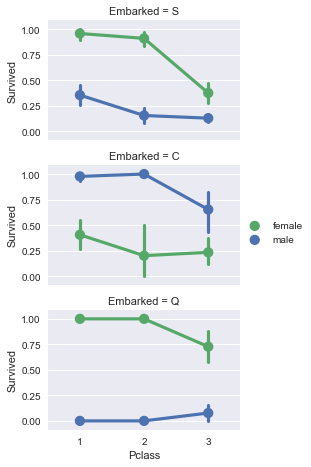

In [34]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived. [Unable to understand this]
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2). [See it for the Q port but not for the C]
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

In [35]:
#g4 = sns.FacetGrid(train_df)
#g4.map(plt.hist, 'Sex', bins=40)

** Cannot do a histogram with non-numerical features such as Sex, Embarked location etc.**

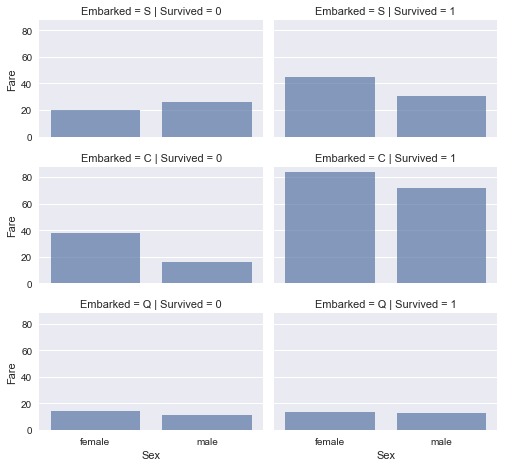

In [36]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.7, ci=None)
grid.add_legend()
#alpha sets the hue, ci is for showing error bars

Not sure what the bar plot is plotting! Let's find out using pandas group by command

In [37]:
train_df[['Sex', 'Fare']].groupby(['Sex']).sum()

,Fare
Sex,
female,13966.6628
male,14727.2865


In [38]:
train_df[['Sex', 'Fare', 'Embarked']].groupby(['Sex', 'Embarked']).sum()

Fare
Sex    Embarked           
female C         5487.3958
       Q          454.8585
       S         7864.4085
male   C         4584.9004
       Q          567.3958
       S         9574.9903

In [39]:
train_df[['Sex', 'Fare', 'Embarked', 'Survived']].groupby(['Embarked', 'Survived']).sum()

Fare
Embarked Survived           
C        0         2658.2501
         1         7414.0461
Q        0          626.7875
         1          395.4668
S        0         8857.6823
         1         8581.7165

In [40]:
train_df[['Sex', 'Fare', 'Embarked', 'Survived']].groupby(['Embarked', 'Sex', 'Survived']).sum()

Fare
Embarked Sex    Survived           
C        female 0          145.9375
                1         5341.4583
         male   0         2512.3126
                1         2072.5878
Q        female 0           98.1417
                1          356.7168
         male   0          528.6458
                1           38.7500
S        female 0         1620.8960
                1         6243.5125
         male   0         7236.7863
                1         2338.2040

In [41]:
train_df[['Sex', 'Fare', 'Embarked', 'Survived']].groupby(['Embarked', 'Sex', 'Survived']).mean()

Fare
Embarked Sex    Survived           
C        female 0         16.215278
                1         83.460286
         male   0         38.065342
                1         71.468545
Q        female 0         10.904633
                1         13.211733
         male   0         13.911732
                1         12.916667
S        female 0         25.728508
                1         44.596518
         male   0         19.881281
                1         30.366286

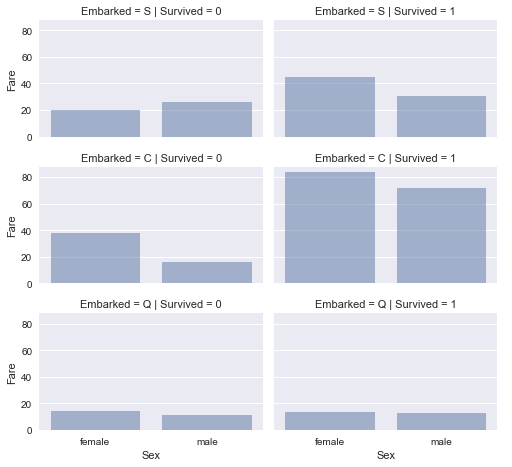

In [42]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, estimator = lambda x: np.mean(x))
grid.add_legend()

The default estimator in the seaborn bar plot is mean, but you change change it

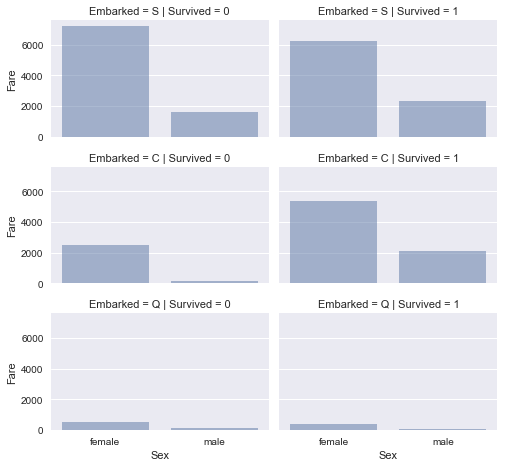

In [43]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, estimator = lambda x: np.sum(x))
grid.add_legend()

In [44]:
pd.crosstab(train_df['Survived'], train_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Crosstab gives the frequency for a given set of values. For instance, the table here tells that 80 people in Pclass 1 didn't survive, 97 in the Pclass 2 didn't survive and so on. Can also get the percentages as follows:

In [45]:
pd.crosstab(train_df['Survived'], train_df['Pclass']).apply(lambda x: x/x.sum(), axis = 1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


x/x.sum() tells to divide by the sum, axis = 1 stands for rows, axis = 0 for columns. The table above says that of the people who died, 15% belonged to the first class, 18% to the second, and 68% to the third. But this could also be because there were just majority of people travelling third class. So, a table like one below helps. It tells that your chance of survival is 63% if you are from first class and then drops down as you go to second and third class. 

Sometimes, margin = True can also be useful.  Note that np.mean() doesn't give the answer we want

In [46]:
pd.crosstab(train_df['Survived'], train_df['Pclass']).apply(lambda x: np.mean(x), axis = 1)

Survived
0    183.0
1    114.0
dtype: float64

In [47]:
pd.crosstab(train_df['Survived'], train_df['Pclass'], margins = True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations.**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

- Consider banding Fare feature.


In [48]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Creating new feature extracting from existing

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

In [49]:
# Do for both the test and training data together
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [50]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [51]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [52]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [53]:
train_df.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       23
Mlle        2
Ms          1
Mme         1
Name: Title, dtype: int64

In [54]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        6
Ms          1
Name: Title, dtype: int64

In [55]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

In [56]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [57]:
pd.crosstab(train_df['Title'], train_df['Survived'], margins = True)

Survived,0,1,All
Title,,,
Master,17,23,40
Miss,55,130,185
Mr,436,81,517
Mrs,26,100,126
Rare,15,8,23
All,549,342,891


In [58]:
train_df[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


As evident from above, the title can be related to the probability of survival. 

We convert the categorical titles to ordinal so that we can use them for ML algorithms.  This is also useful for plotting

In [59]:
# Create a dictionary
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [60]:
test_df.loc[~train_df['Title'].isin(['1','2','3','4','5'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [61]:
train_df.loc[~train_df['Title'].isin(['1','2','3','4','5'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title


No null values in the title

To get rows with particular value in columns can use some cool tricks like 
df.loc[df['columnName'] == some_value], df.loc[df['columnName'] != some_value], 
df.loc[df['columnName'].isin(['some_value1', 'some_value2'])], 
df.loc[~df['columnName'].isin(['some_value1', 'some_value2'])]

df.loc[2] picks out the third row in the column. 

Now we can drop the Name and PassengerId features from training dataset.  We don't drop it from the test data set because we need it later for predictions

In [62]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [63]:
gender_mapping = {"female": 1, "male": 0}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [64]:
train_df[(train_df['Sex'] == 0) & (train_df['Pclass'] == 1)]['Age'].dropna().mean()

41.28138613861386

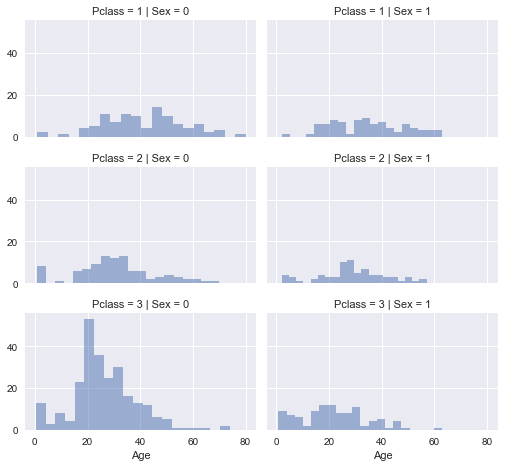

In [65]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [66]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

A 2x3 matrix, because 2 genders and 3 Pclass.  Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [67]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            #guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            guess_ages[i,j] = int(round(age_guess))
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [68]:
train_df.loc[888]

Survived        0
Pclass          3
Sex             1
Age            22
SibSp           1
Parch           2
Fare        23.45
Embarked        S
Title           2
Name: 888, dtype: object

Earlier the age value for this passenger was absent.  Now it has a guessed value 

Let us create Age bands and determine correlations with Survived.

In [69]:
train_df['Age'].min()

0

In [70]:
train_df['Age'].max()

80

In [71]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
# divides the age range into 5 equal parts

In [72]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(20.0, 30.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(30.0, 40.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(20.0, 30.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(30.0, 40.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(30.0, 40.0]"


In [73]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.322751
3,"(30.0, 40.0]",0.448649
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


As expected young ones have a high survival rate

In [74]:
pd.crosstab(train_df['AgeBand'], train_df['Sex'], margins = True) # 1:female, 0:male

Sex,0,1,All
AgeBand,,,
"(-0.08, 10.0]",33,31,64
"(10.0, 20.0]",70,46,116
"(20.0, 30.0]",252,126,378
"(30.0, 40.0]",122,63,185
"(40.0, 50.0]",53,31,84
"(50.0, 60.0]",28,14,42
"(60.0, 70.0]",15,3,18
"(70.0, 80.0]",4,0,4
All,577,314,891


In [75]:
pd.crosstab(train_df['AgeBand'], train_df['Survived'], margins = True) # 1:female, 0:male

Survived,0,1,All
AgeBand,,,
"(-0.08, 10.0]",26,38,64
"(10.0, 20.0]",72,44,116
"(20.0, 30.0]",256,122,378
"(30.0, 40.0]",102,83,185
"(40.0, 50.0]",51,33,84
"(50.0, 60.0]",25,17,42
"(60.0, 70.0]",14,4,18
"(70.0, 80.0]",3,1,4
All,549,342,891


In [76]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7 
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,2,1,0,7.2500,S,1,"(20.0, 30.0]"
1,1,1,1,3,1,0,71.2833,C,3,"(30.0, 40.0]"
2,1,3,1,2,0,0,7.9250,S,2,"(20.0, 30.0]"
3,1,1,1,3,1,0,53.1000,S,3,"(30.0, 40.0]"
4,0,3,0,3,0,0,8.0500,S,1,"(30.0, 40.0]"


We can now remove the ageband feature

In [77]:
train_df = train_df.drop(['AgeBand'], axis=1)

In [78]:
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,2,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


In [79]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,3,0,0,7.8292,Q,1
1,893,3,1,4,1,0,7.0000,S,3
2,894,2,0,6,0,0,9.6875,Q,1
3,895,3,0,2,0,0,8.6625,S,1
4,896,3,1,2,1,1,12.2875,S,3


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [80]:
for dataset in combine:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

In [81]:
train_df[['FamilySize','Survived','Fare']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,FamilySize,Survived,Fare
3,4,0.724138,54.864510
2,3,0.578431,39.692482
1,2,0.552795,49.894129
6,7,0.333333,29.366667
0,1,0.303538,21.242689
4,5,0.200000,58.094453
5,6,0.136364,73.722727
7,8,0.000000,46.900000
8,11,0.000000,69.550000


In [82]:
train_df[['FamilySize','Pclass', 'Survived']].groupby(['Pclass', 'FamilySize'], as_index = False).mean()

,Pclass,FamilySize,Survived
0,1,1,0.532110
1,1,2,0.728571
2,1,3,0.750000
3,1,4,0.714286
4,1,5,1.000000
5,1,6,0.500000
6,2,1,0.346154
7,2,2,0.529412
8,2,3,0.677419
9,2,4,0.769231


Notice that travelling with a family increases chances of survival until your family gets too large -- especially if you belong to PClass = 3. 
It's probably a good idea to create a new feature with Pclass and FamilySize.  But I am a bit lazy here and am just gonna create a feature corresponding to travelling alone, with small family (<= 4) and a big family (> 4). 

In [83]:
for dataset in combine:
    dataset.loc[dataset['FamilySize'] == 1, 'FamilyParameter'] = 1
    dataset.loc[dataset['FamilySize'].isin(['2', '3', '4']), 'FamilyParameter'] = 2
    dataset.loc[dataset['FamilySize'] > 4, 'FamilyParameter'] = 0
    # Arranging the values in increasing order of survival probability

In [84]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,FamilyParameter
0,0,3,0,2,1,0,7.2500,S,1,2,2.0
1,1,1,1,3,1,0,71.2833,C,3,2,2.0
2,1,3,1,2,0,0,7.9250,S,2,1,1.0
3,1,1,1,3,1,0,53.1000,S,3,2,2.0
4,0,3,0,3,0,0,8.0500,S,1,1,1.0


In [85]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis = 1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'], axis = 1)

In [86]:
combine = [train_df, test_df]

In [87]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter
0,0,3,0,2,7.2500,S,1,2.0
1,1,1,1,3,71.2833,C,3,2.0
2,1,3,1,2,7.9250,S,2,1.0
3,1,1,1,3,53.1000,S,3,2.0
4,0,3,0,3,8.0500,S,1,1.0


In [88]:
train_df[['Survived', 'FamilyParameter']].groupby(['FamilyParameter']).mean()

,Survived
FamilyParameter,
0.0,0.161290
1.0,0.303538
2.0,0.578767


In [89]:
train_df['FamilyParameter'] = train_df['FamilyParameter'].astype(int) 
test_df['FamilyParameter'] = test_df['FamilyParameter'].astype(int) 

In [90]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter
0,892,3,0,3,7.8292,Q,1,1
1,893,3,1,4,7.0000,S,3,2
2,894,2,0,6,9.6875,Q,1,1
3,895,3,0,2,8.6625,S,1,1
4,896,3,1,2,12.2875,S,3,2


We can also create an artificial feature combining Pclass and Age.

In [91]:
for dataset in combine:
    dataset['Age * Pclass'] = dataset['Age'] * dataset['Pclass']; 

In [92]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,0,3,0,2,7.2500,S,1,2,6
1,1,1,1,3,71.2833,C,3,2,3
2,1,3,1,2,7.9250,S,2,1,6
3,1,1,1,3,53.1000,S,3,2,3
4,0,3,0,3,8.0500,S,1,1,9


In [93]:
train_df[['Survived', 'Age * Pclass']].groupby(['Age * Pclass']).mean()

,Survived
Age * Pclass,
0,0.593750
1,0.833333
2,0.655172
3,0.446541
4,0.458716
5,0.600000
6,0.265625
7,0.333333
8,0.526316


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [94]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [95]:
train_df['Embarked'].value_counts().max()

644

In [96]:
train_df['Embarked'].value_counts().idxmax()

'S'

In [97]:
train_df.loc[train_df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
61,1,1,1,3,80.0,NaN,2,1,3
829,1,1,1,6,80.0,NaN,3,1,6


In [98]:
for dataset in combine:
    dataset.loc[dataset.Embarked.isnull() , 'Embarked'] = train_df['Embarked'].value_counts().idxmax()

An alternative to using the idxmax function is using mode. 

In [99]:
train_df.Embarked.mode()

0    S
dtype: object

In [100]:
train_df.Embarked.mode()[0]

'S'

### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [101]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({"S": 0, "C":1, "Q":2}).astype(int)
    # Is it necessary to have the type as int?

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null int64
Age                891 non-null int64
Fare               891 non-null float64
Embarked           891 non-null int64
Title              891 non-null int64
FamilyParameter    891 non-null int64
Age * Pclass       891 non-null int64
dtypes: float64(1), int64(8)
memory usage: 62.7 KB


In [103]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Sex                418 non-null int64
Age                418 non-null int64
Fare               417 non-null float64
Embarked           418 non-null int64
Title              418 non-null int64
FamilyParameter    418 non-null int64
Age * Pclass       418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [104]:
test_df.loc[test_df.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
152,1044,3,0,5,NaN,0,1,1,15


In [105]:
test_df.loc[test_df.Fare.isnull(), 'Fare'] = round(test_df.Fare.median(),2)

In [106]:
test_df.iloc[152]

PassengerId        1044.00
Pclass                3.00
Sex                   0.00
Age                   5.00
Fare                 14.45
Embarked              0.00
Title                 1.00
FamilyParameter       1.00
Age * Pclass         15.00
Name: 152, dtype: float64

In [107]:
test_df.loc[test_df['Pclass'] == 1].Fare.min()

0.0

In [108]:
test_df.loc[test_df['Pclass'] == 1].Fare.max()

512.32920000000001

In [109]:
test_df.loc[test_df['Pclass'] == 1].Fare.mean()

94.28029719626169

In [110]:
test_df.loc[test_df['Pclass'] == 1].Fare.median()

60.0

In [111]:
test_df.loc[test_df['Pclass'] == 2].Fare.min()

9.6875

In [112]:
test_df.loc[test_df['Pclass'] == 2].Fare.max()

73.5

In [113]:
test_df.loc[test_df['Pclass'] == 2].Fare.mean()

22.20210430107527

In [114]:
test_df.loc[test_df['Pclass'] == 2].Fare.median()

15.75

In [115]:
test_df.loc[test_df['Pclass'] == 3].Fare.min()

3.1707999999999998

In [116]:
test_df.loc[test_df['Pclass'] == 3].Fare.max()

69.549999999999997

In [117]:
test_df.loc[test_df['Pclass'] == 3].Fare.mean()

12.46880779816514

In [118]:
test_df.loc[test_df['Pclass'] == 3].Fare.median()

7.8958

Just like we had Agebands, we can now create FareBands.  We do this because we can have fares that are widely separated.  

In [119]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

### qcut vs. cut

"Continuous values can be discretized using the cut (bins based on values) and qcut (bins based on sample quantiles) functions"

When you ask for quintiles with qcut, the bins will be chosen so that you have the same number of records in each bin.
cut will choose the bins to be evenly spaced according to the values themselves and not the frequency of those values.

In [120]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass,FareBand
0,0,3,0,2,7.2500,0,1,2,6,"(-0.001, 7.91]"
1,1,1,1,3,71.2833,1,3,2,3,"(31.0, 512.329]"
2,1,3,1,2,7.9250,0,2,1,6,"(7.91, 14.454]"
3,1,1,1,3,53.1000,0,3,2,3,"(31.0, 512.329]"
4,0,3,0,3,8.0500,0,1,1,9,"(7.91, 14.454]"


In [121]:
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [122]:
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31.0), 'Fare'] = 3

In [123]:
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]

In [124]:
train_df[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
0.0,0.197309
1.0,0.308756
2.0,0.445415
3.0,0.581081


In [125]:
train_df[['Fare','Survived']].groupby('Survived').mean()

,Fare
Survived,
0,1.244080
1,1.923977


In [126]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,0,3,0,2,0.0,0,1,2,6
1,1,1,1,3,3.0,1,3,2,3
2,1,3,1,2,1.0,0,2,1,6
3,1,1,1,3,3.0,0,3,2,3
4,0,3,0,3,1.0,0,1,1,9
5,0,3,0,2,1.0,2,1,1,6
6,0,1,0,5,3.0,0,1,1,5
7,0,3,0,0,2.0,0,4,0,0
8,1,3,1,2,1.0,0,3,2,6
9,1,2,1,1,2.0,1,3,2,2


In [127]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,892,3,0,3,0.0,2,1,1,9
1,893,3,1,4,0.0,0,3,2,12
2,894,2,0,6,1.0,2,1,1,12
3,895,3,0,2,1.0,0,1,1,6
4,896,3,1,2,1.0,0,3,2,6
5,897,3,0,1,1.0,0,1,1,3
6,898,3,1,2,0.0,2,2,1,6
7,899,2,0,2,2.0,0,1,2,4
8,900,3,1,1,0.0,1,3,1,3
9,901,3,0,2,2.0,0,1,2,6


## Model, predict and solve


Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

## Let's get rid of the Age * PClass feature which I dislike and seems inconsequential

In [128]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

In [140]:
X_train_mod = train_df.drop(["Survived", "Age * Pclass"], axis=1).copy()

In [141]:
X_train_mod.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter
0,3,0,2,0.0,0,1,2
1,1,1,3,3.0,1,3,2
2,3,1,2,1.0,0,2,1
3,1,1,3,3.0,0,3,2
4,3,0,3,1.0,0,1,1


In [129]:
X_test2  = test_df.drop("PassengerId", axis=1)

In [130]:
X_test2.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,3,0,3,0.0,2,1,1,9
1,3,1,4,0.0,0,3,2,12
2,2,0,6,1.0,2,1,1,12
3,3,0,2,1.0,0,1,1,6
4,3,1,2,1.0,0,3,2,6


In [131]:
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [142]:
X_test_mod  = test_df.drop(["PassengerId", "Age * Pclass"], axis=1).copy()

In [139]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,3,0,3,0.0,2,1,1,9
1,3,1,4,0.0,0,3,2,12
2,2,0,6,1.0,2,1,1,12
3,3,0,2,1.0,0,1,1,6
4,3,1,2,1.0,0,3,2,6


### Using copy()

Using copy() is safe way of doing things. 

Because if you don't make a copy then the indices can still be manipulated elsewhere even if you assign the dataFrame to a different name.

For example:
df2 = df
func1(df2)
func2(df)

func1 can modify df by modifying df2, so to avoid that:
df2 = df.copy()
func1(df2)
func2(df)

In Pandas, indexing a DataFrame returns a reference to the initial DataFrame. Thus, changing the subset will change the initial DataFrame. Thus, you'd want to use the copy if you want to make sure the initial DataFrame shouldn't change.

In [132]:
X_train.shape

(891, 8)

In [133]:
Y_train.shape, X_test.shape

((891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [152]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accLogReg = round(logreg.score(X_train, Y_train) * 100, 18)
accLogReg

82.15488215488216

In [153]:
logreg_mod = LogisticRegression()
logreg_mod.fit(X_train_mod, Y_train)
Y_pred_mod = logreg_mod.predict(X_test_mod)
accLogReg_mod = round(logreg_mod.score(X_train_mod, Y_train) * 100, 18)
accLogReg_mod

82.15488215488216

Dropping the Age * Pclass feature doesn't seem to have any effect on the logistic regression, but as seen later it has an effect on the other models

In [151]:
X_train_mod.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter
0,3,0,2,0.0,0,1,2
1,1,1,3,3.0,1,3,2
2,3,1,2,1.0,0,2,1
3,1,1,3,3.0,0,3,2
4,3,0,3,1.0,0,1,1


In [154]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,3,0,2,0.0,0,1,2,6
1,1,1,3,3.0,1,3,2,3
2,3,1,2,1.0,0,2,1,6
3,1,1,3,3.0,0,3,2,3
4,3,0,3,1.0,0,1,1,9


In [135]:
Y_pred[0:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [136]:
logreg.predict_proba(X_test)[0:10,:]

array([[ 0.90364825,  0.09635175],
       [ 0.3809219 ,  0.6190781 ],
       [ 0.88956474,  0.11043526],
       [ 0.9295446 ,  0.0704554 ],
       [ 0.27595321,  0.72404679],
       [ 0.90648567,  0.09351433],
       [ 0.35531253,  0.64468747],
       [ 0.7191143 ,  0.2808857 ],
       [ 0.26528251,  0.73471749],
       [ 0.88790517,  0.11209483]])

This is the analog of h_theta(x).  The first number is the probability for the first class (in this case y=0) and the second number is the probability for the second class (in this case y=1).  Note that the probabilities add to 1. In the logreg.predict() method, the predict is based on if the probability is >= 0.5. Based on limited reading, there is no way of changing the default.  The article says, it shouldn't be changed, because of the sophisticated algorithms used in practice, 0.5 is the only reasonable choice.  

In [137]:
logreg.predict_proba(X_test).shape

(418, 2)

## A bit about LogisticRegression model from the scikit-learn library


Note we had: from sklearn.linear_model import LogisticRegression

**Following are some of the methods available that are used here (for other functions see the documentation)**

fit(X, y[, sample_weight]):	Fit the model according to the given training data.

predict(X):	Predict class labels for samples in X.

score(X, y[, sample_weight]): Returns the mean accuracy on the given test data and labels.

predict_proba(X): Probability estimates.
The returned estimates for all classes are ordered by the label of classes.




**Following are some of the attributes that available (only coef_ used here)**

coef_ : array, shape (1, n_features) or (n_classes, n_features)
Coefficient of the features in the decision function.
coef_ is of shape (1, n_features) when the given problem is binary.

intercept_ : array, shape (1,) or (n_classes,)
Intercept (a.k.a. bias) added to the decision function.
If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape(1,) when the problem is binary.

intercept_ : array, shape (1,) or (n_classes,)
Intercept (a.k.a. bias) added to the decision function.
If fit_intercept is set to False, the intercept is set to zero. intercept_ is of shape(1,) when the problem is binary.

In [138]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
#coeff_df["Correlation"] = logreg.coef_[0]

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.155273
6,FamilyParameter,0.647716
5,Title,0.370675
4,Embarked,0.256007
7,Age * Pclass,-0.021242
3,Fare,-0.137521
2,Age,-0.244528
0,Pclass,-1.086963


In [147]:
coeff_df_mod = pd.DataFrame(train_df.columns.delete(0))
coeff_df_mod.columns = ['Feature']
coeff_df_mod["Correlation"] = pd.Series(logreg_mod.coef_[0])
#coeff_df["Correlation"] = logreg.coef_[0]

coeff_df_mod.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.149650
6,FamilyParameter,0.646584
5,Title,0.373085
4,Embarked,0.258730
3,Fare,-0.131134
2,Age,-0.284752
0,Pclass,-1.130544
7,Age * Pclass,NaN


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.
Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.

Inversely as Pclass increases, probability of Survived=1 decreases the most.

This way Age * Class seems to be a bad artificial feature to model as its correlation value is zero.

So is Title as third highest positive correlation.

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).


## Let's get rid of the Age * PClass feature which I dislike and seems inconsequential

In [205]:
svc = SVC() #Note: SVC is a classifier, SVM is for regression
ypredictSVC = svc.fit(X_train, Y_train) # you gotta first fit and then predict

In [206]:
svc_mod = SVC() #Note: SVC is a classifier, SVM is for regression
ypredictSVC_mod = svc_mod.fit(X_train_mod, Y_train) # you gotta first fit and then predict

In [207]:
ypredictSVC_mod = svc_mod.fit(X_train_mod, Y_train)

In [203]:
ypredictSVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
y_predict_values = svc.predict(X_train)

In [537]:
y_predict_values[0:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

Let's check the accuracy score

In [209]:
accSVC = round(svc.score(X_train, Y_train) * 100, 4)
accSVC

84.8485

In [211]:
accSVC_mod = round(svc_mod.score(X_train_mod, Y_train) * 100, 4)
accSVC_mod

83.8384

Slightly higher accuracy than the logistic regression
In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

In [213]:
knn = KNeighborsClassifier(n_neighbors = 3) # the default value of n_neighbors is 5. 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accKnn = round(knn.score(X_train, Y_train) * 100, 4)
accKnn

83.7262

In [158]:
knn_mod = KNeighborsClassifier(n_neighbors = 3) # the default value of n_neighbors is 5. 
knn_mod.fit(X_train_mod, Y_train)
Y_pred_mod = knn.predict(X_test_mod)
accKnn_mod = round(knn.score(X_train_mod, Y_train) * 100, 4)
accKnn_mod

86.0831

KNN confidence score is better than Logistics Regression or SVM. 

**With n_neighbors = 1, why isn't the accuracy on training set 100%??**

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [214]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
accGNB = round(gnb.score(X_train, Y_train) * 100, 4)
accGNB

78.7879

In [215]:
gnb_mod = GaussianNB()
gnb_mod.fit(X_train_mod, Y_train)
accGNB_mod = round(gnb_mod.score(X_train_mod, Y_train) * 100, 4)
accGNB_mod

79.0123

The Gaussian NB model generated confidence score is the lowest among the models evaluated so far.


The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference Wikipedia.

In [216]:
prp = Perceptron()
prp.fit(X_train, Y_train)
accPrp = round(prp.score(X_train, Y_train) * 100, 4)
accPrp

81.5937

In [217]:
prp_mod = Perceptron()
prp_mod.fit(X_train_mod, Y_train)
accPrp_mod = round(prp_mod.score(X_train_mod, Y_train) * 100, 4)
accPrp_mod

79.349

LinearSVC is a SVC with a linear kernel. Note that for the linear kernel k(x, x') = x * x'T

In [174]:
lSVC = LinearSVC(tol=0.0001, C = 1.0)
lSVC.fit(X_train, Y_train)
accLSVC = round(lSVC.score(X_train, Y_train) * 100, 14)
accLSVC

81.59371492704825

In [173]:
lSVC_mod = LinearSVC(tol=0.0001, C = 1.0)
lSVC_mod.fit(X_train_mod, Y_train)
accLSVC_mod = round(lSVC.score(X_train_mod, Y_train) * 100, 14)
accLSVC_mod

81.59371492704825

In [184]:
SGDc = SGDClassifier(n_iter = 20)
SGDc.fit(X_train, Y_train)
accSGDc = round(SGDc.score(X_train, Y_train) * 100, 4)
accSGDc

82.3793

In [185]:
SGDc_mod = SGDClassifier(n_iter = 20)
SGDc_mod.fit(X_train_mod, Y_train)
accSGDc_mod = round(SGDc_mod.score(X_train_mod, Y_train) * 100, 4)
accSGDc_mod

78.4512

Note how stochastic gradient descent is stochastic! The accuracy score is different for each run especially when n_iter is small. 

In the documentation n_iter is called max_iter.  Looks like it changed with version.  To find the available options, the function paranthesis do shift+tab. 

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [193]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
accDTC = round(DTC.score(X_train, Y_train) * 100, 40)
accDTC

88.43995510662177

In [192]:
DTC_mod = DecisionTreeClassifier()
DTC_mod.fit(X_train_mod, Y_train)
accDTC_mod = round(DTC_mod.score(X_train_mod, Y_train) * 100, 40)
accDTC_mod

88.43995510662177

The accuracy score for Decision Tree classifier is the highest among all models looked at so far.  Below, let's explore scikit's DecisionTreeClassifier function

In [557]:
DTC.classes_

array([0, 1])

In [558]:
DTC.feature_importances_

array([ 0.11661026,  0.0170572 ,  0.03862024,  0.04826107,  0.04014679,
        0.5264047 ,  0.15763411,  0.05526563])

In [559]:
X_train.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyParameter,Age * Pclass
0,3,0,2,0.0,0,1,2,6
1,1,1,3,3.0,1,3,2,3
2,3,1,2,1.0,0,2,1,6


This says title is the most important followed by FamilyParameter, followed by Pclass

In [560]:
DTC.max_features_

8

In [561]:
DTC.n_classes_

2

In [562]:
DTC.n_features_

8

In [563]:
DTC.n_outputs_

1

In [564]:
DTC.tree_

In [565]:
DTC.decision_path(X_train) # for max_depth = 2, 7 = 4 (2^2) + 2 (branches at second level) + 1(branch at primary level)

<891x307 sparse matrix of type '<type 'numpy.int64'>'
	with 8735 stored elements in Compressed Sparse Row format>

In [566]:
X_train.shape

(891, 8)

In [567]:
DTC.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [573]:
RFC = RandomForestClassifier(n_estimators = 50, criterion = "entropy", verbose = 1)
RFC.fit(X_train, Y_train)
accRFC = round(RFC.score(X_train, Y_train), 4)
accRFC

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


0.8844

In [574]:
RFC.n_features_

8

In [575]:
RFC.feature_importances_

array([ 0.11252833,  0.1983784 ,  0.09110351,  0.1357983 ,  0.06475455,
        0.18720016,  0.10033518,  0.10990156])

In [576]:
RFC.n_outputs_

1

In [195]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
accRFC = round(RFC.score(X_train, Y_train) * 100, 4)
accRFC

87.8788

In [197]:
RFC_mod = RandomForestClassifier()
RFC_mod.fit(X_train_mod, Y_train)
accRFC_mod = round(RFC_mod.score(X_train_mod, Y_train) * 100, 4)
accRFC_mod

88.3277

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. 

In [218]:
modelsComparison = pd.DataFrame({
    'Model':['Logistic Regression', 'Support Vector Classifier', 'K Nearest Neighbors', 'Gaussian Naive Bayes',
            'Perceptron', 'Linear Support Vector Classifier', 'Stochastic Gradient Descent', 
             'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score':[accLogReg, accSVC, accKnn, accGNB, accPrp, accLSVC, accSGDc, accDTC, accRFC]
})

In [219]:
modelsComparison_mod = pd.DataFrame({
    'Model':['Logistic Regression', 'Support Vector Classifier', 'K Nearest Neighbors', 'Gaussian Naive Bayes',
            'Perceptron', 'Linear Support Vector Classifier', 'Stochastic Gradient Descent', 
             'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score':[accLogReg_mod, accSVC_mod, accKnn_mod, accGNB_mod, accPrp_mod, accLSVC_mod, accSGDc_mod, \
             accDTC_mod, accRFC_mod]
})

In [580]:
modelsComparison

,Model,Score
0,Logistic Regression,82.1549
1,Support Vector Classifier,84.8485
2,K Nearest Neighbors,83.7262
3,Gaussian Naive Bayes,78.7879
4,Perceptron,81.5937
5,Linear Support Vector Classifier,81.5937
6,Stochastic Gradient Descent,80.9203
7,Decision Tree Classifier,88.4400
8,Random Forest Classifier,88.4400


In [220]:
modelsComparison.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Decision Tree Classifier,88.439955
8,Random Forest Classifier,87.878800
1,Support Vector Classifier,84.848500
2,K Nearest Neighbors,83.726200
6,Stochastic Gradient Descent,82.379300
0,Logistic Regression,82.154882
5,Linear Support Vector Classifier,81.593715
4,Perceptron,81.593700
3,Gaussian Naive Bayes,78.787900


In [221]:
modelsComparison_mod.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Decision Tree Classifier,88.439955
8,Random Forest Classifier,88.327700
2,K Nearest Neighbors,86.083100
1,Support Vector Classifier,83.838400
0,Logistic Regression,82.154882
5,Linear Support Vector Classifier,81.593715
4,Perceptron,79.349000
3,Gaussian Naive Bayes,79.012300
6,Stochastic Gradient Descent,78.451200


While both Decision Tree and Random Forest score the same (and with droppsing the Age * Pclass feature, Decision Tree does better), we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [222]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
accRFC = round(RFC.score(X_train, Y_train) * 100, 4)
accRFC

87.991

In [223]:
Y_predRFC = RFC.predict(X_test)

In [224]:
submission = pd.DataFrame({
    'PassengerId': test_df.PassengerId,
    'Survived': Y_predRFC
})

In [225]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [226]:
submission.to_csv('sushantPredRFC-Sept-07-17-2.csv', index = False)

This gives a score of 0.78468 on the data on Kaggle

Modified prediction after dropping the 'Age * Pclass' feature 

In [232]:
RFC_mod = RandomForestClassifier()
RFC_mod.fit(X_train_mod, Y_train)
accRFC_mod = round(RFC_mod.score(X_train_mod, Y_train) * 100, 4)
accRFC_mod

87.8788

** Note that the accuracy of random forest is also random ** 

In [237]:
Y_predRFC_mod = RFC_mod.predict(X_test_mod)

In [238]:
submission_mod = pd.DataFrame({
    'PassengerId': test_df.PassengerId,
    'Survived': Y_predRFC_mod
})

In [239]:
submission_mod.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [240]:
submission_mod.to_csv('sushantPredRFC-Sept-07-17-mod.csv', index = False)